<font size=6  color=#003366> <div style="text-align: center"> [LGBIO2050] - Medical Imaging <br><br> 
<div style="text-align: center"> Challenge 1 - Histogram Equalization  </font> <br><br><br>

<font size=5  color=#003366>
<div style="text-align: left"> Professors :   
<font size=4  color=#003366>
<div style="text-align: left"> Prof. G. Kerckhofs  
<div style="text-align: left"> Prof. J. Lee <br>
<div style="text-align: left"> Prof. B. Macq <br>
<div style="text-align: left"> Prof. F. Peeters
<font size=5  color=#003366>
    
<br> <br>
<div style="text-align: left"> Teaching assistants : 
<font size=4  color=#003366>
<div style="text-align: left"> Damien Dasnoy-Sumell (damien.dasnoy@uclouvain.be)<br> 
<div style="text-align: left">Estelle Loÿen (estelle.loyen@uclouvain.be)
<font size=5  color=#003366>
<div style="text-align: right"> 2021-2022 </div>
<br><br>
</font>


<font size=5  color=#003366>
<div style="text-align: left"> Students :   
<font size=4  color=#003366>
<div style="text-align: left"> Conet Brieuc(11181800)<br>
<div style="text-align: left"> Deside Guillaume (39731800)<br>
<div style="text-align: left"> Loffet Alexandre (54701700)
<font size=5  color=#003366>
    
</font>

<font size=6 color=#009999> 1. Guidelines and Deliverables </font> <br> 
   - This assignment is due on **The 14th October 2021**.
   - Copying code or answers from other groups (or from the internet) is strictly forbidden. Each source of inspiration must be clearly indicated.
   - The jupyter notebook containing the code and **detailed answers** to the questions must be delivered in an
archive (.zip folder) on Moodle. The answers have to be written in English.<br> <br>

<font size=6 color=#009999> 2. Context and objective </font> <br> <br>
<div style="text-align: justify">It happens that images contain significant amount of details which are not visually perceptible. 
One reason for this may be that these images are poorly contrasted, i.e., they have a poor dynamic range in their 
pixel intensities. In such situation, applying a transformation to the image that will stretch its dynamic range is 
often desirable.<br>


The normalised histogram of a gray level image is defined by the following equation:
 
$$ p_{r}(k)=\frac{n_{k}}{N}$$

<div style="text-align: justify">where $n_{k}$  is the the number of pixels with gray level $k$ and $k = 0, 1, ...L-1$ and $N$ is the total number of 
pixels. $p_{r}(k)$ can be interpreted as the probability of occurrence of gray level $k$. A plot of $n_{k}$ versus $k$ is known as a histogram.<br> 
    

<div style="text-align: justify">Gray level transformations applied to the histogram are among the simplest of image enhancement techniques. However, such transforms have a wide range of applications despite their simplicity.<br>


Histogram Equalization (HE) is the transformation of the histogram denoted by $T$ and depicted by the Equation:

$$ s(k) = T(r_{k})= \sum_{j=0}^{k} p_{r}(r_{j}) = \sum_{j=0}^{k}\frac{n_{k}}{N} $$


<font size=6 color=#009999> 3. Data importation </font> <br> <br>

<div class="alert alert-info">
<b>QUESTION 1</b>  <br>
In the following cell, import the images of the chest and knee radiographs (chest.png & knee.jpeg).  

### Import

In [16]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import numpy as np

In [17]:
nb_bins = 256 #use in histogram

### Chest's image + histogram

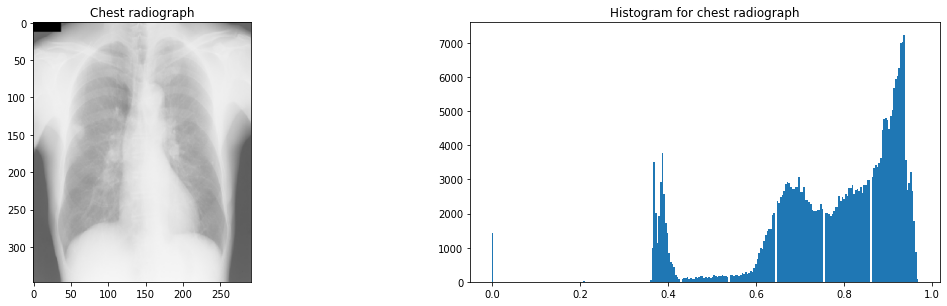

In [18]:
img_chest = imread("imgs/chest.png")
fig =plt.figure(figsize=(16,8))
fig.set_size_inches(18.5, 10.5)

ax1=fig.add_subplot(221)
ax1.imshow(img_chest,cmap="gray")

ax2=fig.add_subplot(222)
ax2.hist(img_chest.flatten()/255,bins=nb_bins)



ax1.title.set_text('Chest radiograph')
ax2.title.set_text('Histogram for chest radiograph')
plt.show()

### Knee's image + histogram

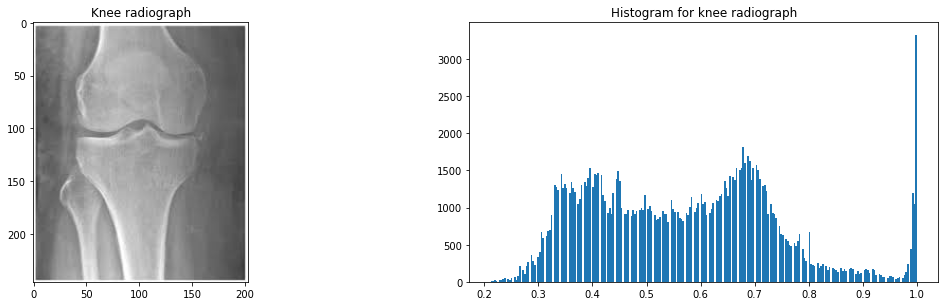

In [19]:
img_knee = imread("imgs/knee.jpeg")

fig =plt.figure(figsize=(16,8))
fig.set_size_inches(18.5, 10.5)

ax1=fig.add_subplot(221)
ax1.imshow(img_knee,cmap="gray")

ax2=fig.add_subplot(222)
ax2.hist(img_knee.flatten()/255,bins=nb_bins)

ax1.title.set_text('Knee radiograph')
ax2.title.set_text('Histogram for knee radiograph')
plt.show()

<font size=6 color=#009999> 4. Histogram Equalization implementation </font> <br> <br>
<div class="alert alert-info">
<b>QUESTION 2</b>  <br>
Implement (by yourself!) the Histogram Equalization method. 

<div style="text-align: justify">You are not allowed to use implemented version of the code (openCV, Skimage, PIL,...). Show your results on the chest and knee radiographs and comment. Show the effect on the image histogram and comment.

### implementation of Histogram Equalization

In [20]:
def histeq(img):
    """
    img : image on which we apply transformation

    return image with transformation
    """
    arr =img.flatten()
    hist = np.zeros(256)
    for k in arr :
        hist[k] += 1
    hist = hist/len(arr)
    new_hist= np.cumsum(hist)
    new_hist=new_hist*255
    img_new = new_hist[arr]
    img_new = np.reshape(img_new,img.shape)
    return img_new

In [21]:
def csum(img):
    arr =img.flatten()
    hist = np.zeros(256)
    for k in arr :
        hist[k] += 1
    hist = hist/len(arr)
    new_hist= np.cumsum(hist)
    return new_hist


### Histogram Equalization of chest's image

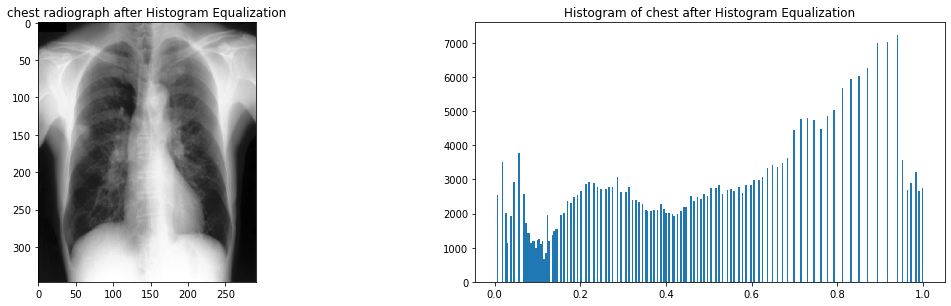

In [22]:
new_img_chest = histeq(img_chest)

fig = plt.figure(figsize=(16,8))
fig.set_size_inches(18.5, 10.5)


ax1 = fig.add_subplot(221)
ax1.imshow(rgb2gray(new_img_chest),cmap="gray")
ax1.title.set_text("chest radiograph after Histogram Equalization")

ax2 = fig.add_subplot(222)
ax2.hist(new_img_chest.flatten()/255,bins=nb_bins)
ax2.title.set_text("Histogram of chest after Histogram Equalization")
plt.show()

#### Comparasion of cumulative sum

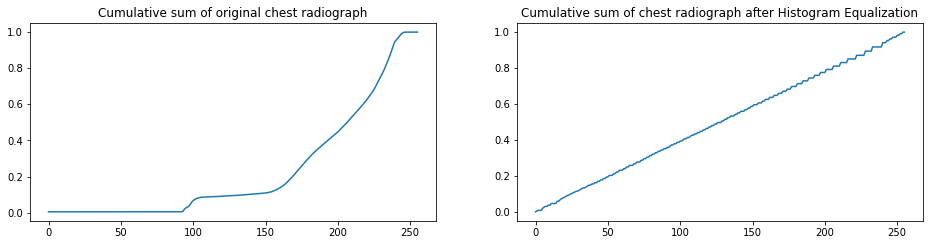

In [23]:
chest_cumsum = csum(img_chest)

chest_hist_cumsum = csum(new_img_chest.astype(int))


fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(221)
ax1.plot(np.arange(0,256,1),chest_cumsum)
ax1.title.set_text("Cumulative sum of original chest radiograph")

ax2 = fig.add_subplot(222)
ax2.plot(np.arange(0,256,1),chest_hist_cumsum)
ax2.title.set_text("Cumulative sum of chest radiograph after Histogram Equalization")
plt.show()

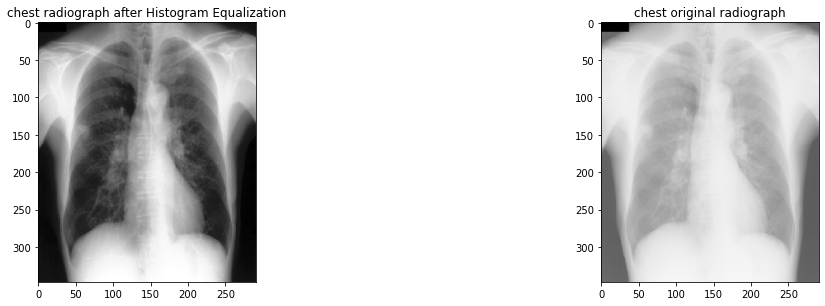

In [24]:
fig = plt.figure(figsize=(16,8))
fig.set_size_inches(18.5, 10.5)

ax1 = fig.add_subplot(221)
ax1.imshow(rgb2gray(new_img_chest),cmap="gray")
ax1.title.set_text("chest radiograph after Histogram Equalization")

ax2 = fig.add_subplot(222)
ax2.imshow(img_chest,cmap ="gray")
ax2.title.set_text("chest original radiograph")
plt.show()

### Histogram Equalization of knee's image

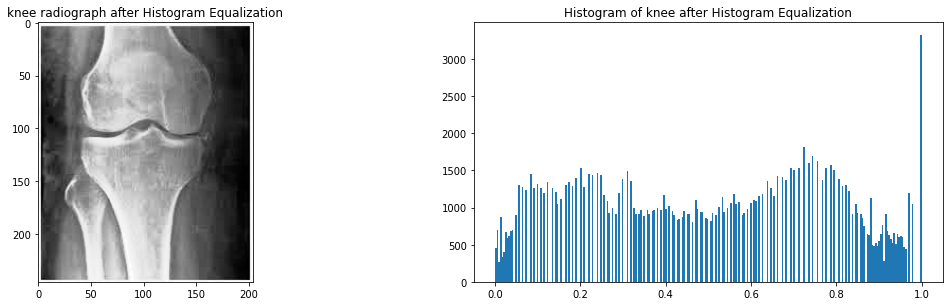

In [26]:
new_img_knee= histeq(img_knee)

fig = plt.figure(figsize=(16,8))
fig.set_size_inches(18.5, 10.5)

ax1 = fig.add_subplot(221)
ax1.imshow(rgb2gray(new_img_knee),cmap="gray")
ax1.title.set_text("knee radiograph after Histogram Equalization")

ax2 = fig.add_subplot(222)
ax2.hist(new_img_knee.flatten()/255,bins=nb_bins)
ax2.title.set_text("Histogram of knee after Histogram Equalization")
plt.show()

#### Comparasion of cumulative sum

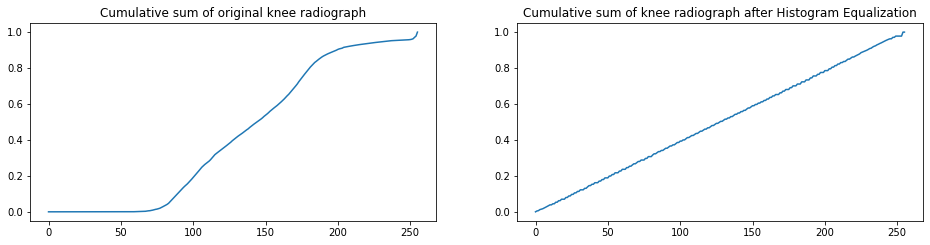

In [11]:
knee_cumsum = csum(img_knee)

knee_hist_cumsum = csum(new_img_knee.astype(int))


fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(221)
ax1.plot(np.arange(0,256,1),knee_cumsum)
ax1.title.set_text("Cumulative sum of original knee radiograph")

ax2 = fig.add_subplot(222)
ax2.plot(np.arange(0,256,1),knee_hist_cumsum)
ax2.title.set_text("Cumulative sum of knee radiograph after Histogram Equalization")
plt.show()

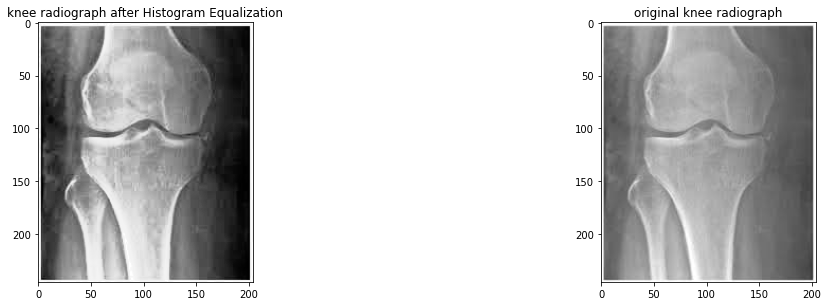

In [32]:
fig = plt.figure(figsize=(16,8))
fig.set_size_inches(18.5, 10.5)
ax1 = fig.add_subplot(221)
ax1.imshow(rgb2gray(new_img_knee),cmap="gray")
ax1.title.set_text("knee radiograph after Histogram Equalization")

ax2 = fig.add_subplot(222)
ax2.imshow(img_knee,cmap ="gray")
ax2.title.set_text("original knee radiograph")
plt.show()

#### Comments

Comments on the results on the chest and knee radiographs:

Comments on the results on the image histogram:

<div class="alert alert-info">
<b>QUESTION 3</b>  <br>
What are the main drawbacks of Histogram Equalization? 

<ul>
  <li>
It doesn't work well for all images, especially for images that are already using a wide range of the grey spectrum. </li>
  <li>It's a global level method, taking into account all pixels. Thus, it can increase the contrast of the background noise while reducing the usable signal.</li>
  <li>It requires calculating and creating the cumulative histogram, which is a quite costly process. </li>
    <li>The algorithm is not reversible. We cannot get back to the original image once the histogram equalization is done if we do not have the original spectrum wide. </li>
</ul>

<div class="alert alert-info">
<b>QUESTION 4</b>  <br>
What happens when you apply consecutively Histogram Equalization multiple times on the same image?

In [29]:
nb_consecutive = 3 

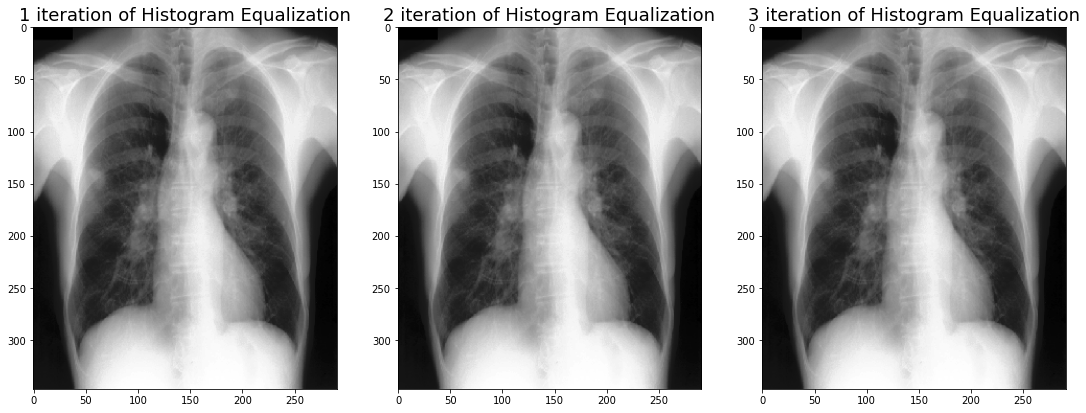

In [30]:
fig, axes = plt.subplots(1, nb_consecutive)
fig.set_size_inches(18.5, 10.5)
img_iterative = img_chest
img_comparaison = np.around(histeq(img_iterative))
for k in range(nb_consecutive):
    img_iterative = np.around(histeq(img_iterative))
    # assert (img_comparaison == img_iterative).all() #allow to test if images are similiar
    img_iterative = img_iterative.astype(int)
    axes[k].imshow(rgb2gray(img_iterative),cmap="gray")
    axes[k].title.set_text(f"{k+1} iteration of Histogram Equalization")
    axes[k].title.set_size(18)
    
plt.show()

Comments on the multiple times application:

### Sources:

<ul>
  <li><a href="https://medium.com/@kyawsawhtoon/a-tutorial-to-histogram-equalization-497600f270e2">A tutorial to Histogram Equalization</a> </li>
  <li> <a href="https://hackernoon.com/histogram-equalization-in-python-from-scratch-ebb9c8aa3f23">Histogram Equalization in Python from Scratch</a> </li>
  <li>  <a href="https://www.tutorialspoint.com/dip/histogram_equalization.htm">Histogram Equalization</a> </li>
</ul>